# Sentiment Annlysis

## Importing The Necessary Library

In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

## Download NLTK Resources

In [ ]:
# Downloading the necessary NLTK resources for text processing
nltk.download('stopwords')
nltk.download('wordnet') # for WordNet Lemmatizer to get root forms of words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amreldomohy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amreldomohy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load The DataSet

In [111]:
df = pd.read_csv("sentiment.csv", index_col= False)
pd.set_option('display.max_rows', None) # To show all rows when it too much
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Preprocessing 

In [ ]:
# Define stopwords (common words that don't add much meaning)
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer to reduce words to their base form (e.g., 'running' -> 'run')
lemmatizer = WordNetLemmatizer()

# Function to clean the text data
def clean_text(text):
    # Remove URLs (anything starting with http or www)
    text = re.sub(r'http\S+|www\S+|https\S+', '', str(text))

    # Remove mentions and hashtags (e.g., @user or #hashtag)
    text = re.sub(r'\@\w+|\#','', text)

    # Convert all text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (numbers, punctuation, etc.)
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Lemmatize each word and remove stopwords
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text # Return the cleaned text

# Apply the clean_text function to the 'Text' column and create a new 'Cleaned_Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [113]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight


In [114]:
df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'Cleaned_Text'],
      dtype='object')

In [ ]:
# Remove The Unnecessary column 
df.drop('Unnamed: 0.1',axis=1,inplace=True)
df.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight


In [ ]:
# Checking the values in Sentiment column 
# As we see their is too much values are equal to positive
df["Sentiment"].unique()
df["Sentiment"].value_counts()


Sentiment
Positive                 44
Joy                      42
Excitement               32
Neutral                  14
Contentment              14
Happy                    14
Hopeful                   9
Sad                       9
Gratitude                 9
Curiosity                 8
Embarrassed               8
Loneliness                7
Elation                   6
Bad                       6
Despair                   6
Hate                      6
Playful                   6
Gratitude                 5
Curiosity                 5
Enthusiasm                5
Inspired                  5
Empowerment               5
Contentment               5
Serenity                  5
Determination             5
Acceptance                5
Ambivalence               5
Nostalgia                 5
Melancholy                5
Numbness                  5
Confusion                 5
Serenity                  5
Indifference              5
Frustrated                5
Bitterness                5
Euphoria  

In [ ]:
# Define the correct mapping
positive_sentiments = [
    'Positive', 'Joy', 'Excitement', 'Contentment', 'Gratitude', 'Serenity', 'Happy', 
    'Awe', 'Hopeful', 'Acceptance', 'Determination', 'Euphoria', 'Elation', 'Pride', 
    'Enthusiasm', 'Inspiration', 'Playful', 'Inspired', 'Empowerment', 'Hope', 
    'Happiness', 'Arousal', 'Calmness', 'Compassionate', 'Grateful', 'Proud', 
    'Enchantment', 'Tenderness', 'Admiration', 'Thrill', 'Fulfillment', 'Reverence',
    'Compassion', 'Reflection', 'Adventure', 'Wonder', 'Satisfaction', 'Harmony',
    'Creativity', 'Accomplishment', 'Amusement', 'Kind', 'Love', 'Anticipation', 
    'Empathetic', 'Free-spirited', 'Confident', 'Exploration', 'Radiance', 
    'Coziness', 'Rejuvenation', 'Resilience', 'Whimsy', 'Enjoyment', 'Tranquility',
    'Mischievous', 'Adoration', 'Affection', 'Zest', 'Ecstasy', 'Colorful', 
    'Touched', 'Charm', 'Hypnotic', 'Connection', 'Iconic', 'Journey', 'Celebration',
    'Energy', 'Engagement', 'Celestial Wonder', 'Nature\'s Beauty', 'Triumph',
    'Creative Inspiration', 'Thrilling Journey', 'Runway Creativity', 'Ocean\'s Freedom',
    'Marvel', 'Spark', 'Immersion', 'CulinaryOdyssey', 'Wonderment', 'Optimism',
    'JoyfulReunion', 'Motivation', 'Overjoyed', 'Success', 'Friendship', 
    'Kindness', 'Positivity'
]

negative_sentiments = [
    'Negative', 'Despair', 'Loneliness', 'Sad', 'Grief', 'Desolation', 'Bad', 
    'Melancholy', 'Hate', 'Frustration', 'Ambivalence', 'Regret', 'Numbness', 
    'Bitterness', 'Frustrated', 'Disgust', 'Betrayal', 'Isolation', 'Sorrow', 
    'Disappointment', 'Sadness', 'Envy', 'Captivation', 'Helplessness', 'Anxiety',
    'Contemplation', 'Anger', 'Disappointed', 'Loss', 'Devastated', 'Jealous', 
    'Envious', 'Fearful', 'Resentment', 'Jealousy', 'Bitter', 'Heartbreak', 
    'Shame', 'Darkness', 'LostLove', 'Desperation', 'EmotionalStorm', 'Suffering'
]

neutral_sentiments = [
    'Neutral', 'Curiosity', 'Indifference', 'Surprise', 'Dismissive', 'Emotion', 
    'Reflection', 'Isolation', 'InnerJourney', 'Pensive', 'Elegance', 'Imagination',
    'Winter Magic', 'Ruins', 'Relief', 'Whispers of the Past', 'DreamChaser', 
    'PlayfulJoy', 'Suspense', 'Mindfulness', 'Romance', 'Intrigue', 'Heartwarming'
]

# Create the mapping function
def categorize_sentiment(sentiment):
    if sentiment in positive_sentiments:
        return 'Positive'
    elif sentiment in negative_sentiments:
        return 'Negative'
    elif sentiment in neutral_sentiments:
        return 'Neutral'
    else:
        return 'Neutral'  # If not found, default to Neutral

# Remove all spaces inside sentiment strings
df['Sentiment'] = df['Sentiment'].str.replace(' ', '', regex=False)

df['Sentiment'] = df['Sentiment'].apply(categorize_sentiment)


In [118]:
df["Sentiment"].unique()
df["Sentiment"].value_counts()

Sentiment
Positive    425
Negative    164
Neutral     143
Name: count, dtype: int64

In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to predict sentiment based on the text
def get_sentiment(text):
     # Get the sentiment score using VADER
    score = analyzer.polarity_scores(text)

    # Classify as Positive, Negative, or Neutral based on the 'compound' score
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the get_sentiment function to the 'Cleaned_Text' column and create a new 'Predicted_Sentiment' column
df['Predicted_Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

In [ ]:
# Also checking for the values in Platform column 
df["Platform"] = df["Platform"].str.strip().sort_values()
df["Platform"].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

In [ ]:
# As we see their is duplicates in the column , may if we remove the spaces it will fixed ? 
df["Country"].unique()
df["Country"].value_counts()

Country
 USA                    59
 USA                    55
 UK                     49
 Canada                 44
 Australia              41
 Canada                 34
 UK                     33
 India                  21
 USA                    20
 Canada                 17
 UK                     13
 Australia              12
 USA                    12
 Brazil                 11
 India                  11
 USA                    10
 France                 10
 India                  10
 Japan                  10
 Canada                 10
 UK                      9
 USA                     9
USA                      9
 Germany                 9
 Italy                   8
 India                   8
 UK                      8
 UK                      7
 Canada                  7
 Canada                  6
 Canada                  6
 Australia               6
 UK                      6
 India                   5
 Australia               5
 India                   5
 Australia          

In [122]:
df["Country"] = df["Country"].str.strip()
df["Country"].value_counts()

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway              1
Cambodia            1
Maldives            1
Peru                1
Jordan              1
Thailand            1
Name: count, dtype: int64

In [ ]:
# Checking for nulls 
df.isnull().sum()

Id                     0
Text                   0
Sentiment              0
Timestamp              0
User                   0
Platform               0
Hashtags               0
Retweets               0
Likes                  0
Country                0
Year                   0
Month                  0
Day                    0
Hour                   0
Cleaned_Text           0
Predicted_Sentiment    0
dtype: int64

In [ ]:
# Checking for any other duplicate 
df.duplicated().sum()

np.int64(0)

## Visualizations

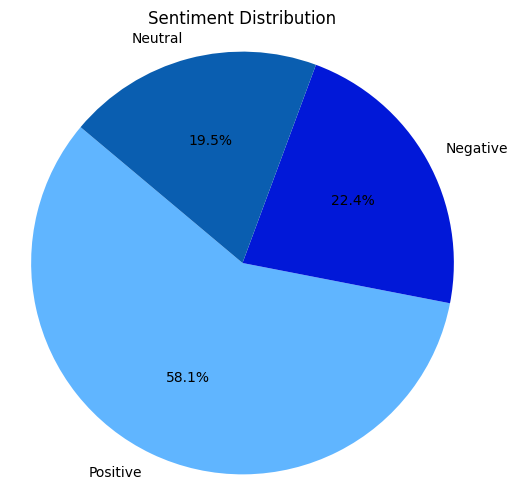

In [125]:
colors = ["#60B5FF", "#0118D8", "#0A5EB0", "#37AFE1","#000957", ]
# Count each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, 
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

The sentiment analysis reveals a strong positive bias, with 58.1% of responses classified as positive. Negative sentiments represent 22.4%, while neutral sentiments account for 19.5%. Overall, the feedback landscape is overwhelmingly positive, indicating high satisfaction and minimal critical sentiment.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_29608/1467172443.py:15: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=yearly_sentiment, x='Year', y='Count', hue='Sentiment', marker='o', palette=colors)


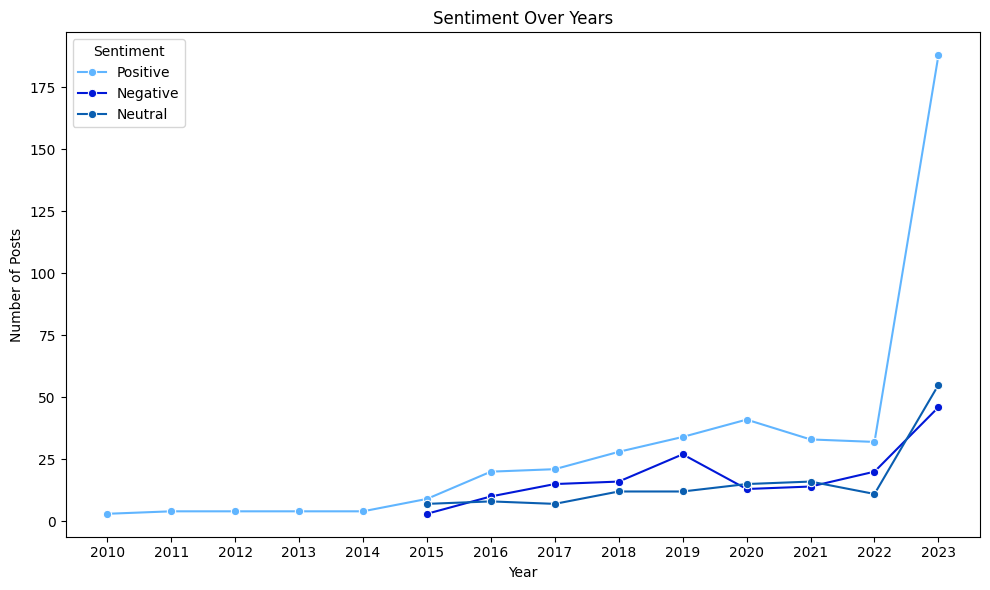

In [126]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


# Extract Year
df['Year'] = df['Timestamp'].dt.year

# Group by Year and Sentiment
yearly_sentiment = df.groupby(['Year', 'Sentiment']).size().reset_index(name='Count')

# Sort for better line flow
yearly_sentiment = yearly_sentiment.sort_values('Year')

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_sentiment, x='Year', y='Count', hue='Sentiment', marker='o', palette=colors)
plt.title('Sentiment Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.xticks(yearly_sentiment['Year'].unique())  # Make sure all years show up
plt.tight_layout()
plt.show()



The sentiment trend from 2010 to 2023 shows a significant increase in activity over time.
 Positive sentiment consistently leads, with a sharp and unprecedented surge in 2023.
  Negative and neutral sentiments have also risen, but at a comparatively modest rate. 
  The spike in 2023 indicates a major event or change driving a large volume of overwhelmingly positive reactions, suggesting heightened engagement and overall optimism in recent discourse.

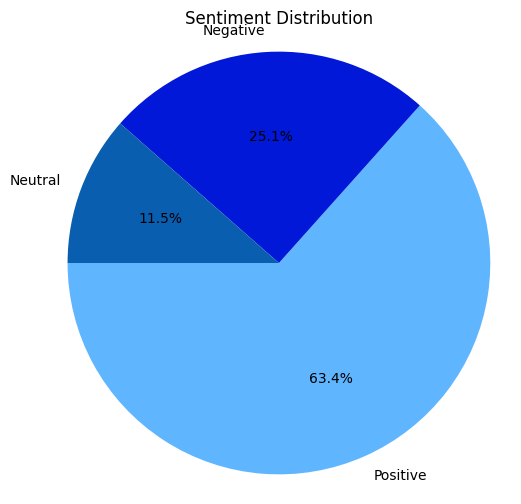

In [127]:
sentiment_counts = df['Predicted_Sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
         autopct='%1.1f%%', startangle=180, colors=colors)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

The model predicts a sentiment distribution that is slightly more positive and polarized compared to the actual data. Positive sentiment is expected to increase from 58.1% to 63.4%, while negative sentiment also slightly rises from 22.4% to 25.1%. Neutral sentiment, however, is projected to decline notably from 19.5% to 11.5%, indicating that the model anticipates stronger, more definitive opinions and fewer neutral responses.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_29608/4256072532.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=df, x='Platform', hue='Sentiment', palette=colors)


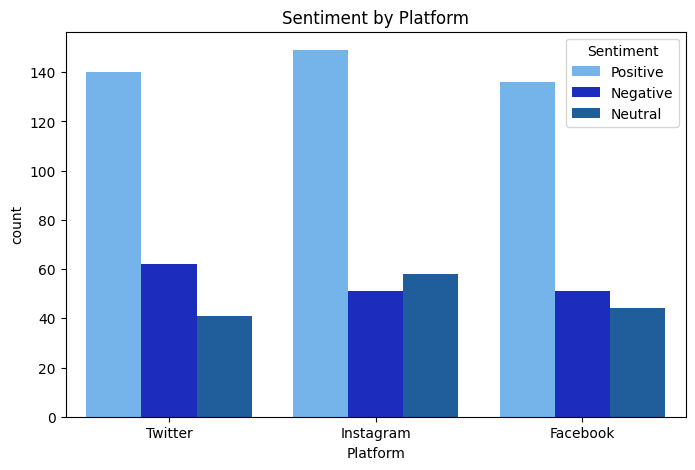

In [128]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Platform', hue='Sentiment', palette=colors)
plt.title('Sentiment by Platform')
plt.show()


* Positive sentiment is the highest across all platforms — Twitter, Instagram, and Facebook — with Instagram slightly leading.
* Negative sentiment is fairly consistent across platforms, but Twitter has a slightly higher count than Instagram and Facebook.
* Neutral sentiment varies more: Instagram has the highest neutral sentiment, followed by Facebook, then Twitter.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_29608/1221276824.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=df, x='Country', hue='Sentiment',


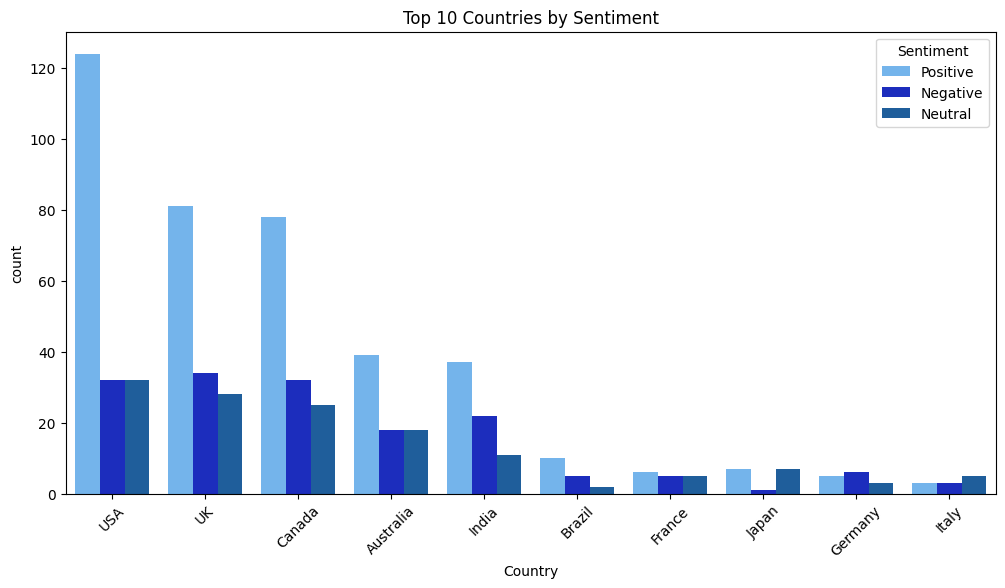

In [129]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Country', hue='Sentiment',
               palette=colors, order=df['Country'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Sentiment')
plt.show()


* Positive sentiment dominates across all top 10 countries.
* USA shows the highest sentiment activity overall, followed by the UK and Canada.
* Australia and India show moderate activity, still with positivity leading.
* Brazil, France, Japan, Germany, and Italy have low but balanced sentiment counts.
* In every country, positive sentiment outweighs negative and neutral consistently.

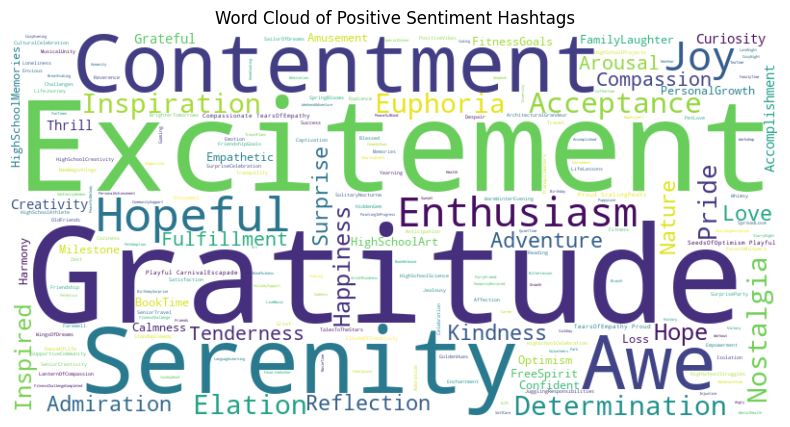

In [130]:
positive_tags = df[df['Predicted_Sentiment'] == 'Positive']['Hashtags'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_tags)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Hashtags')
plt.show()


* The most prominent positive sentiment hashtags are Gratitude, Excitement, Contentment, and Serenity.
* Other frequently appearing themes include Hopeful, Inspiration, Awe, Joy, Pride, and Enthusiasm.
* Overall, the positive hashtags center around emotions of happiness, peace, motivation, and appreciation.


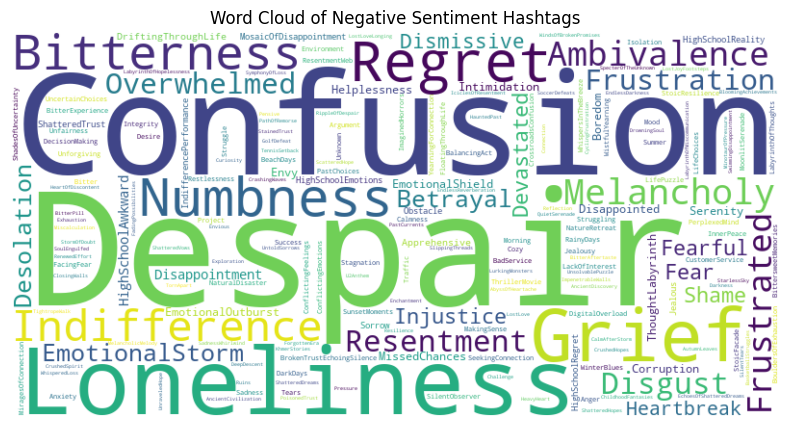

In [131]:
# Create a text blob for negative hashtags
negative_tags = df[df['Predicted_Sentiment'] == 'Negative']['Hashtags'].dropna().str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(negative_tags)

# Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Hashtags')
plt.show()


The word cloud highlights Confusion, Despair, Loneliness, Bitterness, and Grief as the most common negative sentiments. It reflects strong emotional struggles related to sadness, isolation, and trust issues, with an overall theme of mental and emotional distress.

## Key Findings

* Top emotions: Confusion, Despair, Loneliness, Grief, Bitterness.
* Trust and social breakdown: High frequency of terms like Betrayal and ShatteredTrust.
* Mental health indicators: Strong presence of terms related to anxiety, depression, and emotional struggle.
* Emotional complexity: Users show not just sadness or anger but layered emotions like Ambivalence and Overwhelmed.

## Key Recommendations

* Mental Health Awareness: Organizations should consider initiatives focused on emotional support and counseling based on the identified negative trends.
* Community Engagement: Foster supportive online communities to address feelings of loneliness and isolation.
* Content Moderation: Platforms could enhance detection of emotionally distressed posts to provide timely support.
* Further Analysis: A deeper dive using topic modeling (LDA, NMF) could offer more granular themes beyond hashtags.

In [ ]:
df.to_csv("updated_sentiment.csv")